In [1]:
import xmltodict
from bs4 import BeautifulSoup
import pprint
import os
import re
import pandas as pd

import skimage
import matplotlib.pyplot as plt

In [2]:
image_folder = os.path.join(os.getcwd(),'IMAGE_DATA')

In [3]:
image_root = os.path.join(image_folder,os.listdir(image_folder)[0])

In [4]:
image_root_lst = os.listdir(image_root)

In [5]:

r = re.compile('(Index)')
# re.findall(r,image_root_lst)
idx_file = list(filter(r.findall,image_root_lst))[0]


In [6]:
with open(os.path.join(image_root,idx_file),'r') as f:
    index_xml = f.read()

In [7]:
idx_xml = BeautifulSoup(index_xml,'xml')

In [8]:
# ind_file.find('<Col>'==22)
# ind_file.find_all('Wells', {'Col': [22]})

In [9]:
idx_dict = xmltodict.parse(index_xml)

In [10]:
# pprint.pprint(idx_dict['EvaluationInputData'])

In [11]:
idx_dict['EvaluationInputData'].keys()

dict_keys(['@Version', '@xmlns', '@xmlns:xsd', '@xmlns:xsi', 'User', 'InstrumentType', 'Plates', 'Wells', 'Maps', 'Images'])

In [12]:
mod_well_lst_to_df = []

for cnt in range(len(idx_dict['EvaluationInputData']['Wells']['Well'])):
    well_temp_df = pd.DataFrame.from_dict(idx_dict['EvaluationInputData']['Wells']['Well'][cnt],orient='columns')
    well_temp_df['Image'] = [item.pop('@id') for item in well_temp_df['Image']]
    mod_well_lst_to_df.append(well_temp_df)
    well_table=pd.concat(mod_well_lst_to_df,axis=0)

In [13]:
well_table.reset_index(drop=True,inplace=True)

In [14]:
well_table.head()

,id,Col,Row,SublayoutID,Image
0,0101,1,1,1,0101K1F1P1R1
1,0101,1,1,1,0101K1F1P1R2
2,0101,1,1,1,0101K1F2P1R1
3,0101,1,1,1,0101K1F2P1R2
4,0101,1,1,1,0101K1F3P1R1


In [15]:
#channelID 1 = HOECHST
#channelID 2 = mCherry
image_table = pd.DataFrame.from_dict(idx_dict['EvaluationInputData']['Images']['Image'],orient='columns')
image_table.head()

,id,State,Row,Col,ChannelID,FieldID,PlaneID,TimepointID,SequenceID,GroupID,AbsTime,AbsPositionZ,MeasurementTimeOffset,URL
0,0101K1F1P1R1,None,1,1,1,1,1,1,1,1,2022-11-15T22:28:38.0496000Z,"{'@Unit': 'm', '#text': '0.1349009528967997'}",0,r01c01-1719728043.tiff
1,0101K1F1P1R2,None,1,1,2,1,1,1,1,1,2022-11-15T22:28:38.6892000Z,"{'@Unit': 'm', '#text': '0.1349009528967997'}",0.639600038528,r01c01-1299190045.tiff
2,0101K1F2P1R1,None,1,1,1,2,1,1,1,1,2022-11-15T22:28:39.4380000Z,"{'@Unit': 'm', '#text': '0.1349040863366522'}",1.38840007782,r01c01-0436032609.tiff
3,0101K1F2P1R2,None,1,1,2,2,1,1,1,1,2022-11-15T22:28:39.9684000Z,"{'@Unit': 'm', '#text': '0.1349040863366522'}",1.91880011559,r01c01-0695440784.tiff
4,0101K1F3P1R1,None,1,1,1,3,1,1,1,1,2022-11-15T22:28:40.8576000Z,"{'@Unit': 'm', '#text': '0.1349020074760486'}",2.80800008774,r01c01-1938356943.tiff


In [16]:
p_ctl_metadata = image_table[image_table['Col']=='22']
p_ctl_metadata.head()

,id,State,Row,Col,ChannelID,FieldID,PlaneID,TimepointID,SequenceID,GroupID,AbsTime,AbsPositionZ,MeasurementTimeOffset,URL
126,0122K1F1P1R1,None,1,22,1,1,1,1,1,1,2022-11-15T22:53:40.6260096Z,"{'@Unit': 'm', '#text': '0.13498944511922153'}",1502.5764091,r01c22-0584869840.tiff
127,0122K1F1P1R2,None,1,22,2,1,1,1,1,1,2022-11-15T22:53:41.1564096Z,"{'@Unit': 'm', '#text': '0.13498944511922153'}",1503.10680914,r01c22-2111396476.tiff
128,0122K1F2P1R1,None,1,22,1,2,1,1,1,1,2022-11-15T22:53:42.4044096Z,"{'@Unit': 'm', '#text': '0.134989877075187'}",1504.35480905,r01c22-0165009493.tiff
129,0122K1F2P1R2,None,1,22,2,2,1,1,1,1,2022-11-15T22:53:42.9348096Z,"{'@Unit': 'm', '#text': '0.134989877075187'}",1504.88520908,r01c22-2023344791.tiff
130,0122K1F3P1R1,None,1,22,1,3,1,1,1,1,2022-11-15T22:53:43.9020096Z,"{'@Unit': 'm', '#text': '0.13498634681459504'}",1505.85240912,r01c22-1365878811.tiff


In [17]:
p_ctl_metadata['image_root_folder'] = image_root

C:\Users\marfok\AppData\Local\Temp\ipykernel_24548\1373054125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_ctl_metadata['image_root_folder'] = image_root


In [18]:
# get HOESCHT image

In [19]:
p_ctl_metadata[p_ctl_metadata.ChannelID.eq('2')]['URL'].iloc[0] 

'r01c22-2111396476.tiff'

In [20]:
p_ctl_metadata

,id,State,Row,Col,ChannelID,FieldID,PlaneID,TimepointID,SequenceID,GroupID,AbsTime,AbsPositionZ,MeasurementTimeOffset,URL,image_root_folder
126,0122K1F1P1R1,None,1,22,1,1,1,1,1,1,2022-11-15T22:53:40.6260096Z,"{'@Unit': 'm', '#text': '0.13498944511922153'}",1502.5764091,r01c22-0584869840.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
127,0122K1F1P1R2,None,1,22,2,1,1,1,1,1,2022-11-15T22:53:41.1564096Z,"{'@Unit': 'm', '#text': '0.13498944511922153'}",1503.10680914,r01c22-2111396476.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
128,0122K1F2P1R1,None,1,22,1,2,1,1,1,1,2022-11-15T22:53:42.4044096Z,"{'@Unit': 'm', '#text': '0.134989877075187'}",1504.35480905,r01c22-0165009493.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
129,0122K1F2P1R2,None,1,22,2,2,1,1,1,1,2022-11-15T22:53:42.9348096Z,"{'@Unit': 'm', '#text': '0.134989877075187'}",1504.88520908,r01c22-2023344791.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
130,0122K1F3P1R1,None,1,22,1,3,1,1,1,1,2022-11-15T22:53:43.9020096Z,"{'@Unit': 'm', '#text': '0.13498634681459504'}",1505.85240912,r01c22-1365878811.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287,1622K1F1P1R2,None,16,22,2,1,1,1,1,1,2022-11-15T22:52:34.5912092Z,"{'@Unit': 'm', '#text': '0.13489568258617993'}",1436.54160905,r16c22-1657699482.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
2288,1622K1F2P1R1,None,16,22,1,2,1,1,1,1,2022-11-15T22:52:35.8548092Z,"{'@Unit': 'm', '#text': '0.13489894448944267'}",1437.80520916,r16c22-1734411264.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
2289,1622K1F2P1R2,None,16,22,2,2,1,1,1,1,2022-11-15T22:52:36.3852092Z,"{'@Unit': 'm', '#text': '0.13489894448944267'}",1438.3356092,r16c22-0524236398.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
2290,1622K1F3P1R1,None,16,22,1,3,1,1,1,1,2022-11-15T22:52:37.2588092Z,"{'@Unit': 'm', '#text': '0.13489325815789818'}",1439.2092092,r16c22-0431998733.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...


Text(0.5, 1.0, 'mCherry')

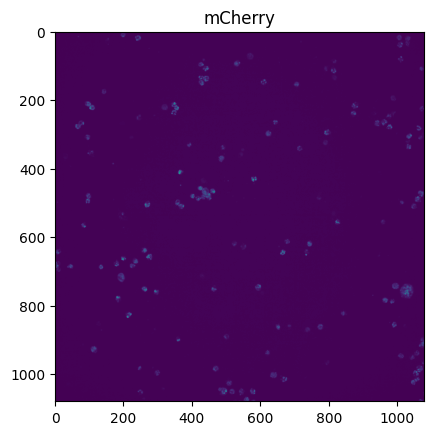

In [21]:
im1 = os.path.join(p_ctl_metadata['image_root_folder'].iloc[0],p_ctl_metadata[p_ctl_metadata.ChannelID.eq('2')]['URL'].iloc[0] )
plt.imshow(skimage.io.imread(im1))
plt.title('mCherry')

In [22]:
len(p_ctl_metadata['image_root_folder'])

96

In [23]:
len(p_ctl_metadata[p_ctl_metadata.ChannelID.eq('2')]['URL'])

48

In [24]:
trim_pctl = p_ctl_metadata[['id','Row','Col','ChannelID','FieldID','URL','image_root_folder']]
h_df = trim_pctl[trim_pctl.ChannelID.eq('1')] 
m_df = trim_pctl[trim_pctl.ChannelID.eq('2')]

In [25]:
# 16 total images
display(h_df.head())
print(h_df.shape)

,id,Row,Col,ChannelID,FieldID,URL,image_root_folder
126,0122K1F1P1R1,1,22,1,1,r01c22-0584869840.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
128,0122K1F2P1R1,1,22,1,2,r01c22-0165009493.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
130,0122K1F3P1R1,1,22,1,3,r01c22-1365878811.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
270,0222K1F1P1R1,2,22,1,1,r02c22-1656980324.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
272,0222K1F2P1R1,2,22,1,2,r02c22-1027735946.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...


(48, 7)


In [26]:
display(m_df.head())
print(m_df.shape)

,id,Row,Col,ChannelID,FieldID,URL,image_root_folder
127,0122K1F1P1R2,1,22,2,1,r01c22-2111396476.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
129,0122K1F2P1R2,1,22,2,2,r01c22-2023344791.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
131,0122K1F3P1R2,1,22,2,3,r01c22-0711364633.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
271,0222K1F1P1R2,2,22,2,1,r02c22-2137399416.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
273,0222K1F2P1R2,2,22,2,2,r02c22-0509830294.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...


(48, 7)


In [27]:
for i in range(p_ctl_metadata.shape[0]//2):
    print('mCherry image path: ', os.path.join(p_ctl_metadata['image_root_folder'].iloc[i],p_ctl_metadata[p_ctl_metadata.ChannelID.eq('2')]['URL'].iloc[i]))
    print('HOECHST image path: ', os.path.join(p_ctl_metadata['image_root_folder'].iloc[i],p_ctl_metadata[p_ctl_metadata.ChannelID.eq('1')]['URL'].iloc[i]))

mCherry image path:  c:\Users\marfok\OneDrive - Bristol Myers Squibb\Desktop\Archetecture 2.0\DSAA\HCS\Unsupervised\UMM-Discovery_repo\UMM-Discovery\UMM-Discovery\IMAGE_DATA\0037d066-8793-4b33-9d8d-c1fe0b36a567\r01c22-2111396476.tiff
HOECHST image path:  c:\Users\marfok\OneDrive - Bristol Myers Squibb\Desktop\Archetecture 2.0\DSAA\HCS\Unsupervised\UMM-Discovery_repo\UMM-Discovery\UMM-Discovery\IMAGE_DATA\0037d066-8793-4b33-9d8d-c1fe0b36a567\r01c22-0584869840.tiff
mCherry image path:  c:\Users\marfok\OneDrive - Bristol Myers Squibb\Desktop\Archetecture 2.0\DSAA\HCS\Unsupervised\UMM-Discovery_repo\UMM-Discovery\UMM-Discovery\IMAGE_DATA\0037d066-8793-4b33-9d8d-c1fe0b36a567\r01c22-2023344791.tiff
HOECHST image path:  c:\Users\marfok\OneDrive - Bristol Myers Squibb\Desktop\Archetecture 2.0\DSAA\HCS\Unsupervised\UMM-Discovery_repo\UMM-Discovery\UMM-Discovery\IMAGE_DATA\0037d066-8793-4b33-9d8d-c1fe0b36a567\r01c22-0165009493.tiff
mCherry image path:  c:\Users\marfok\OneDrive - Bristol Myers Sq

In [28]:
p_ctl_metadata['compound'] = 'POS-000001'

C:\Users\marfok\AppData\Local\Temp\ipykernel_24548\1735611418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_ctl_metadata['compound'] = 'POS-000001'


In [29]:
p_ctl_metadata['compound_uM'] = 'uM'

C:\Users\marfok\AppData\Local\Temp\ipykernel_24548\2743659340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_ctl_metadata['compound_uM'] = 'uM'


In [30]:
p_ctl_metadata['table_nr'] = 'Blank'

C:\Users\marfok\AppData\Local\Temp\ipykernel_24548\2764959845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_ctl_metadata['table_nr'] = 'Blank'


In [31]:
p_ctl_metadata.reset_index(drop=True,inplace=True)

In [32]:
p_ctl_metadata.loc[0, 'compound']

'POS-000001'

In [33]:
j =[]
for i,row in p_ctl_metadata.iterrows():
    j.append(p_ctl_metadata.loc[i,'compound'])
       

In [36]:
p_ctl_metadata['pseudoclass'] = ['NA'.format(i) for i in range(p_ctl_metadata.shape[0])]

C:\Users\marfok\AppData\Local\Temp\ipykernel_24548\2374892303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_ctl_metadata['pseudoclass'] = ['NA'.format(i) for i in range(p_ctl_metadata.shape[0])]


In [73]:
# for i in p_ctl_metadata['pseudoclass'].unique():
#     print(i)

In [37]:
p_ctl_metadata.head()

,id,State,Row,Col,ChannelID,FieldID,PlaneID,TimepointID,SequenceID,GroupID,AbsTime,AbsPositionZ,MeasurementTimeOffset,URL,image_root_folder,compound,compound_uM,table_nr,pseudoclass
0,0122K1F1P1R1,None,1,22,1,1,1,1,1,1,2022-11-15T22:53:40.6260096Z,"{'@Unit': 'm', '#text': '0.13498944511922153'}",1502.5764091,r01c22-0584869840.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,NA
1,0122K1F1P1R2,None,1,22,2,1,1,1,1,1,2022-11-15T22:53:41.1564096Z,"{'@Unit': 'm', '#text': '0.13498944511922153'}",1503.10680914,r01c22-2111396476.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,NA
2,0122K1F2P1R1,None,1,22,1,2,1,1,1,1,2022-11-15T22:53:42.4044096Z,"{'@Unit': 'm', '#text': '0.134989877075187'}",1504.35480905,r01c22-0165009493.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,NA
3,0122K1F2P1R2,None,1,22,2,2,1,1,1,1,2022-11-15T22:53:42.9348096Z,"{'@Unit': 'm', '#text': '0.134989877075187'}",1504.88520908,r01c22-2023344791.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,NA
4,0122K1F3P1R1,None,1,22,1,3,1,1,1,1,2022-11-15T22:53:43.9020096Z,"{'@Unit': 'm', '#text': '0.13498634681459504'}",1505.85240912,r01c22-1365878811.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...,POS-000001,uM,Blank,NA


In [38]:
p_ctl_metadata.columns

Index(['id', 'State', 'Row', 'Col', 'ChannelID', 'FieldID', 'PlaneID',
       'TimepointID', 'SequenceID', 'GroupID', 'AbsTime', 'AbsPositionZ',
       'MeasurementTimeOffset', 'URL', 'image_root_folder', 'compound',
       'compound_uM', 'table_nr', 'pseudoclass'],
      dtype='object')

In [75]:
p_ctl_metadata.to_csv('sample_data.csv')

In [ ]:


# # r = re.compile('.*r04c11')
# r = re.compile('(Index)')

# with open (list(filter(r.findall,im_lst))[0],'r') as f:
#     z = f.read()
# z


# import numpy as np
# samp = np.array([21,22,33,4,5,6,7,87])
# mask = np.array([0,0,0,1,1,1,1,0],dtype=bool)
# samp[mask]

